### Objetivos

  - Conhecer e praticar Arquiteturas de Redes Neurais Convolucionais pré-treinadas
  

## Arquitetura de Redes Neurais Convolucionais

Existem diversas arquitetura de CNN, cada rede com suas próprias características, principalmente para visão computacional. Mas todas terão em comum camadas de convolução e maxpooling, dropout e algumas coisas a mais...


### Por que utilizar uma arquitetura CNN

Utilizar uma arquitetura de CNN possibilita reduzir o tempo de pesquisa com o desenvolvimento de novas arquiteturas uma vez que essas arquiteturas já foram sistematicamente revisadas.



### Exemplos de arquiteturas:

`LeNET`: Desenvolvida em 1998 por Yann LeCun, a LeNet foi pioneira no uso de camadas de convolução com filtros 5x5 e passo 1, além de camadas de agrupamento com filtros 2x2 e passo 2, intercaladas por camadas totalmente conectadas (FC). A ordem das camadas é: CONV-POOL-CONV-POOL-FC-FC. Essa arquitetura teve um papel fundamental no reconhecimento de dígitos manuscritos.

![](https://pt.d2l.ai/_images/lenet.svg)

`AlexNET`: Criada em 2012 por Alex Krizhevsky, Ilya Sutskever e Geoffrey Hinton, a AlexNet é uma arquitetura mais avançada que a LeNet. Possui cinco camadas convolucionais seguidas de três camadas FC, e emprega a função de ativação ReLU. Vencedora da competição ImageNet de 2012, marcou o início da popularização das redes neurais convolucionais profundas.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/0*pJ3o_2zTTNnixhKH.png)

`VGG`: A arquitetura VGG, concebida em 2014 pelo Visual Geometry Group da Universidade de Oxford, propôs o uso de filtros menores (3x3) em redes mais profundas, com no mínimo 16 camadas convolucionais e maxpooling com filtros 2x2. Apesar de os filtros menores gerarem menos parâmetros, as camadas FC e as convoluções iniciais demandavam grande quantidade de memória RAM, resultando em uma rede pesada.

![](https://production-media.paperswithcode.com/methods/vgg_7mT4DML.png)

`GoogleNET`: Paralelamente à VGG, em 2014, pesquisadores do Google desenvolveram a GoogleNet, que introduziu o módulo Inception como elemento fundamental. Com nove módulos Inception em sequência, a arquitetura utiliza convoluções 3x3 e 5x5 precedidas por convoluções 1x1 para diminuir o custo computacional. A GoogleNet foi projetada para ser eficiente em termos de recursos e venceu a competição ImageNet de 2014.

![](https://media.geeksforgeeks.org/wp-content/uploads/20200429201549/Inceptionv1_architecture.png)


`ResNET`: A rede residual, proposta em 2015 por Kaiming He e colaboradores, tem como característica principal a inclusão de conexões residuais (curto-circuitos) a cada duas convoluções, adicionando um resultado anterior ao resultado futuro. Isso permite treinar redes mais profundas sem problemas de degradação do desempenho. ResNets com 50, 101 e 152 camadas utilizam blocos residuais com "bottleneck", que consistem em duas convoluções 3x3 intercaladas por convoluções 1x1, diminuindo o custo computacional.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/0*9LqUp7XyEx1QNc6A.png)

`MobileNet`: Proposta em 2017, é uma arquitetura otimizada para dispositivos móveis e aplicativos com limitações de recursos computacionais. Utiliza convoluções separáveis por profundidade para reduzir o número de parâmetros e o consumo de memória.

`EfficientNet`: Proposta em 2019, é uma família de redes neurais convolucionais que busca melhorar a eficiência em termos de recursos computacionais e desempenho, através do ajuste coordenado da largura, profundidade e resolução das redes.

`InceptionV3`: Uma evolução do GoogleNet, a InceptionV3 é uma arquitetura desenvolvida em 2015 que aprimora o módulo Inception e implementa técnicas de normalização em lotes. Essa arquitetura alcança um desempenho superior com menos parâmetros e menor custo computacional.

`DenseNet`: Proposta em 2016, a DenseNet é uma arquitetura que introduz conexões densas entre as camadas. Cada camada recebe as características de todas as camadas anteriores, o que melhora o fluxo de informações e gradientes durante o treinamento. Isso permite a construção de redes mais profundas e eficientes.

`YOLO` (You Only Look Once): É uma arquitetura de rede neural focada em detecção de objetos em tempo real. Proposta em 2016, a YOLO divide a imagem em regiões e prevê, de uma só vez, as probabilidades de classes e as coordenadas das caixas delimitadoras. A YOLO é conhecida por sua velocidade e capacidade de detectar objetos em tempo real.

`Transformer`: Embora não seja uma arquitetura de rede neural convolucional, o Transformer, proposto em 2017, é uma arquitetura de rede neural notável para processamento de linguagem natural e outras tarefas sequenciais. O Transformer introduziu o conceito de atenção auto-regressiva, que permite que a rede aprenda relacionamentos complexos entre as entradas, e tem sido a base para modelos de linguagem de última geração, como BERT e GPT.


Parace que são muitas, mas essas são apenas algumas arquiteturas de redes neurais desenvolvidas nos últimos anos. Dependendo da aplicação e das restrições de recursos, você pode encontrar uma arquitetura adequada às suas necessidades específicas.

### Modelos de CNN pré-treinados

O treinamento de uma boa CNN não é simples, além de muitos dados (milhares de imagens) e muito tempo de processamento.

Mas usar essas redes é super super facil!! 

Vamos usar o VGG16 para fazer a classificação de uma imagem.

Recomendo dar uma olhada na documentação oficial do Keras:  [https://keras.io/api/applications/](https://keras.io/api/applications/)


In [8]:
import numpy as np
from tensorflow.keras.preprocessing import image


## importa o modelo da VGG16 pré-treinado
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions



In [9]:
# Carrega o modelo VGG16 pré-treinado com ImageNet:
model = VGG16()


In [10]:
import matplotlib.pyplot as plt

# Função para visualizar imagem
def display_image(img_path):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

<!-- ![](https://images.tcdn.com.br/img/img_prod/777105/bicicleta_29_hope_21_velocidades_shimano_freios_disco_tamanho_17_12475_1_ac0b7c63eee851b87bcc9832033c9826.jpg) -->

A imagem é carregada e transformada de (224, 224), para (1, 224, 224, 3)


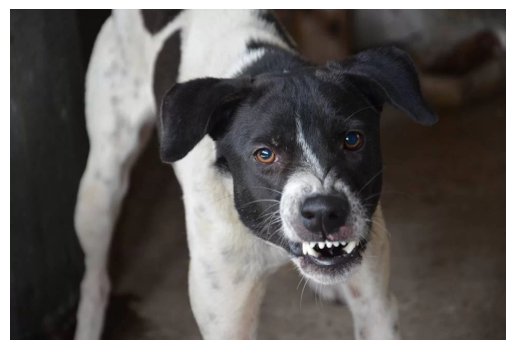

In [11]:
# Carrega uma imagem e prepara para ser predita pela VGG16

## teste 1
# !wget https://images.tcdn.com.br/img/img_prod/777105/bicicleta_29_hope_21_velocidades_shimano_freios_disco_tamanho_17_12475_1_ac0b7c63eee851b87bcc9832033c9826.jpg -O /content/bike.jpg
# img_path = 'bike.jpg'

# teste 2
#!wget https://liberal.com.br/wp-content/uploads/2019/11/buraco-rua-dos-anturios.jpg -O /content/buraco.jpg
#img_path = 'buraco.jpg'

# teste 3
#img_path = 'COLOQUE_UMA_IMAGEM.jpg'

# se estiver rodando localmente, descomente a linha abaixo
#img_path = 'COLOQUE_UMA_IMAGEM.jpg'
img_path = 'lab_images/dog.png'



img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) # (x,y,canal) -- (batch, x, y, canal)
x = preprocess_input(x)
print("A imagem é carregada e transformada de {}, para {}".format(img.size,x.shape))
display_image(img_path)

In [12]:
## faz a predição da imagem

preds = model.predict(x)

# preds[0].shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


O método `decode_predictions` é usado para decodificar as previsões de modelos pré-treinados.

- Recebe um array das previsões de um modelo, pode adicionar argumento top para filtrar o melhor.
- Retorna uma lista de listas de tuplas contendo as previsões de classe mais prováveis. Cada tupla contém o `imagenet_id` o `label` e o `score`.

In [ ]:
decoded_preds = decode_predictions(preds,top=3)[0]

for i, (_, label, score) in enumerate(decoded_preds):
    print(f"{i+1}. {label}: {score * 100:.2f}%")
    


1. Great_Dane: 84.05%
2. American_Staffordshire_terrier: 6.51%
3. whippet: 1.78%


### Desafio

Agora avalie outras arquiteturas de redes neurais disponíveis no Keras, como `ResNet50`, `InceptionV3`, `MobileNet` e `EfficientNet`. 

Simples: Basta substituir a importação e a função de carregamento do modelo conforme necessário. Por exemplo, para usar a ResNet50:

A imagem é carregada e transformada de (224, 224), para (1, 224, 224, 3)


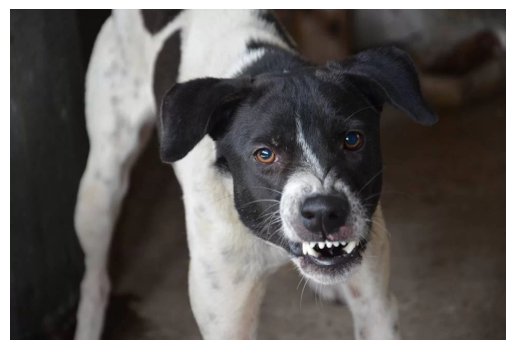

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1. Great_Dane: 92.32%
2. whippet: 2.93%
3. boxer: 0.86%


In [17]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')


#### seu código aqui....

img_path = 'lab_images/dog.png'



img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) # (x,y,canal) -- (batch, x, y, canal)
x = preprocess_input(x)
print("A imagem é carregada e transformada de {}, para {}".format(img.size,x.shape))
display_image(img_path)


preds = model.predict(x)


decoded_preds = decode_predictions(preds,top=3)[0]

for i, (_, label, score) in enumerate(decoded_preds):
    print(f"{i+1}. {label}: {score * 100:.2f}%")